 Teste dos filtros de mediana e de equalização de histograma implementados em src/preprocessamento/filtros

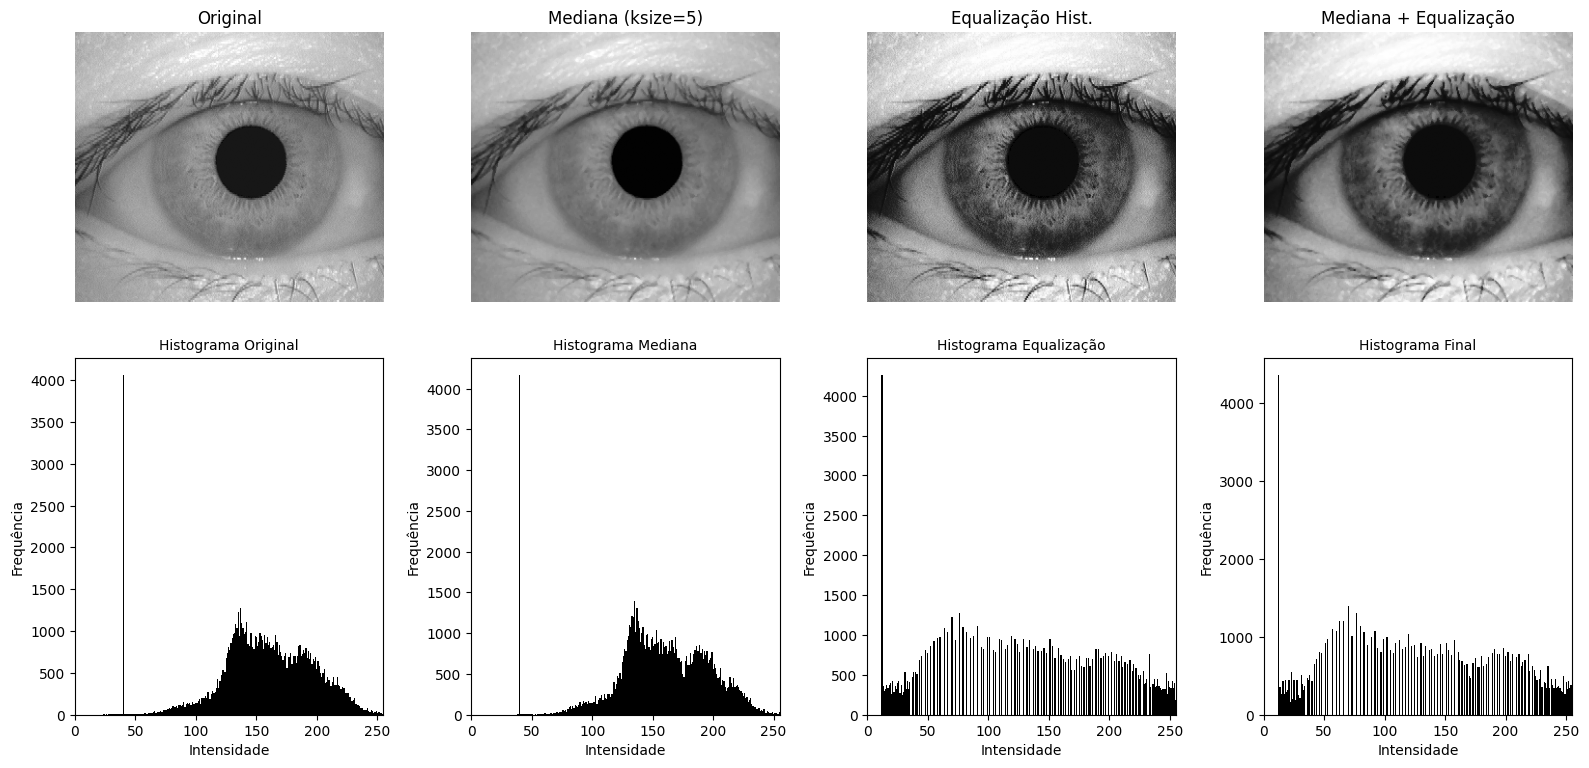

In [35]:
import sys
import os
from pathlib import Path

# 1) Ajusta o sys.path para incluir a raiz do projeto
ROOT = Path.cwd().parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

# 2) Imports necessários
import cv2
import matplotlib.pyplot as plt

from src.preprocessamento.filtros import filtro_mediana, equalizacao_histograma

# 3) Função auxiliar para plotar um histograma num eixo específico
def plot_hist_on_ax(ax, hist, title: str):
    """
    Recebe um eixo Matplotlib, uma lista de frequências 'hist' de 0..255
    e desenha um gráfico de barras naquele eixo.
    """
    ax.bar(range(256), hist, width=1.0, color='black')
    ax.set_xlim(0, 255)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("Intensidade")
    ax.set_ylabel("Frequência")

# 4) Carrega e processa uma imagem de exemplo
img_path = ROOT / "data" / "raw" / "001_1_1.bmp"
img       = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

# Aplica filtro de mediana e equalização
denoised     = filtro_mediana(img, 3)
equalizada1  = equalizacao_histograma(img)
equalizada2  = equalizacao_histograma(denoised)

# 5) Calcula histogramas manualmente
h_orig      = [(img     == v).sum() for v in range(256)]
h_denoised  = [(denoised== v).sum() for v in range(256)]
h_eq1       = [(equalizada1== v).sum() for v in range(256)]
h_eq2       = [(equalizada2== v).sum() for v in range(256)]

# 6) Cria figura com 2 linhas x 4 colunas
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# --- Linha 1: exibe as imagens ---
# 0,0: original
axs[0, 0].imshow(img,       cmap='gray')
axs[0, 0].set_title("Original")
# 0,1: filtrada
axs[0, 1].imshow(denoised,  cmap='gray')
axs[0, 1].set_title("Mediana (ksize=5)")
# 0,2: equalizada original
axs[0, 2].imshow(equalizada1, cmap='gray')
axs[0, 2].set_title("Equalização Hist.")
# 0,3: filtrada + equalizada
axs[0, 3].imshow(equalizada2, cmap='gray')
axs[0, 3].set_title("Mediana + Equalização")

# --- Linha 2: exibe os histogramas correspondentes ---
plot_hist_on_ax(axs[1, 0], h_orig,     "Histograma Original")
plot_hist_on_ax(axs[1, 1], h_denoised, "Histograma Mediana")
plot_hist_on_ax(axs[1, 2], h_eq1,      "Histograma Equalização")
plot_hist_on_ax(axs[1, 3], h_eq2,      "Histograma Final")

# 7) Remove eixos desnecessários das imagens (linha 1)
for j in range(4):
    axs[0, j].axis('off')

# 8) Ajusta layout e exibe tudo
plt.tight_layout()
plt.show()


Julgando de maneira visual, a imagem que não passa pelo filtro de mediana antes de equalizar o histograma tem um resultado de contraste melhor sem perder detalhes da íris
 Em futuro desenvolvimento iremos checar na prática qual abordagem tem melhores resultados

Testando o processamento e salvamento da imagem

2025-05-21 21:34:31 [INFO] Imagens salvas: equalized -> c:\Users\Windows\Desktop\IFSCar\PDI\Projeto\828521-PDI\reconhecimento_iris\data\preprocessed\001_1_1_equalized.bmp, processed -> c:\Users\Windows\Desktop\IFSCar\PDI\Projeto\828521-PDI\reconhecimento_iris\data\preprocessed\001_1_1_processed.bmp


Imagem filtrada salva em: c:\Users\Windows\Desktop\IFSCar\PDI\Projeto\828521-PDI\reconhecimento_iris\data\preprocessed\001_1_1_processed.bmp
Imagem equalizada salva em: c:\Users\Windows\Desktop\IFSCar\PDI\Projeto\828521-PDI\reconhecimento_iris\data\preprocessed\001_1_1_equalized.bmp


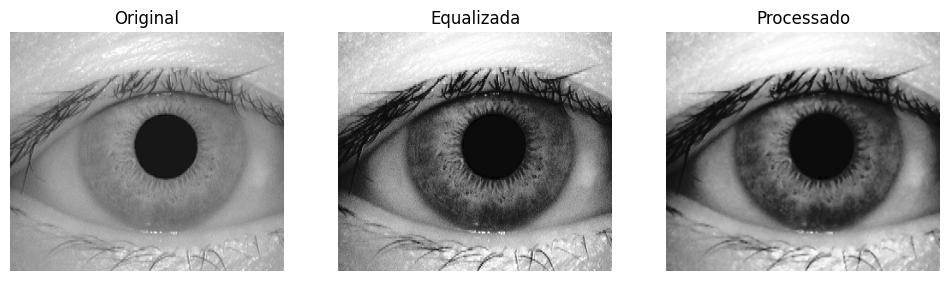

In [29]:
from pathlib import Path
from src.preprocessamento.salva_processado import processa_e_salva

# Define onde estão as imagens originais e para onde salvar as processadas
raw_dir = Path(ROOT) / "data" / "raw"            # pasta com imagens brutas
out_dir = Path(ROOT) / "data" / "preprocessed"   # pasta para salvar resultados

# Escolhe uma imagem de exemplo para processar
img_path = raw_dir / '001_1_1.bmp'               # caminho completo da imagem

# Executa o pipeline: iguala o contraste e depois aplica mediana+equalização
# Retorna dois caminhos: (imagem_eq_original, imagem_processada)
eq_path, proc_path = processa_e_salva(img_path, out_dir, 3)

# Informa o usuário onde cada arquivo foi salvo
print(f"Imagem filtrada salva em: {proc_path}")
print(f"Imagem equalizada salva em: {eq_path}")

# Agora, para visualizar no notebook, carregamos as imagens em escala de cinza
import cv2
import matplotlib.pyplot as plt

# Lê a imagem bruta original
img_orig = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)

#le a imagem equalizada
img_eq = cv2.imread(str(eq_path), cv2.IMREAD_GRAYSCALE)
# Lê a versão final processada (mediana + equalização)
img_proc = cv2.imread(str(proc_path),   cv2.IMREAD_GRAYSCALE)


# Exibe lado a lado: à esquerda a original,no meio equalizada, à direita a processada(mediana + equalização) 

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].imshow(img_orig, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(img_eq, cmap="gray")
axs[1].set_title("Equalizada")
axs[2].imshow(img_proc, cmap="gray")
axs[2].set_title("Processado")
for ax in axs: ax.axis("off")
plt.show()
